<a href="https://colab.research.google.com/github/plaban1981/Huggingface_transformers_course/blob/main/Huggingface_Sentence_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.5MB 14.3MB/s 
     |████████████████████████████████| 3.3MB 43.0MB/s 
     |████████████████████████████████| 901kB 44.8MB/s 


## sentence-transformers/bert-base-nli-mean-tokens
This is a sentence-transformers model: It maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 24.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-cp37-none-any.whl size=126711 sha256=06a8398d80521b2e8fdff8b1e548e0e7bbf57c7dd0596f64a27eff6781fb3a1f
  Stored in directory: /root/.cache/pip/wheels/38/d2/98/d191289a877a34c68aa67e05179521e060f96394a3e9336be6
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')
embeddings = model.encode(sentences)
print(embeddings)


[[-0.39309978  0.03886302  1.987425   ... -0.6093678  -1.0946213
   0.32649013]
 [ 0.06153374  0.3273622   1.8332323  ... -0.12985389  0.46089387
   0.24035414]]


In [ ]:
len(embeddings)

2

In [ ]:
len(embeddings[0])

768

In [ ]:
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This is an example sentence
Embedding: [-3.93099785e-01  3.88630219e-02  1.98742497e+00 -1.36893660e-01
  1.93089932e-01  3.74968022e-01  1.15455024e-01  3.02820861e-01
  2.32356414e-01 -1.23269163e-01 -2.69239873e-01  4.10017639e-01
 -2.14587659e-01  1.45402789e-01  4.17345554e-01 -2.67232984e-01
 -2.92259783e-01 -1.81809574e-01  9.90739286e-01 -7.87549555e-01
 -7.95891285e-02  7.74834692e-01 -3.67453396e-01 -1.04439950e+00
  3.26537281e-01 -8.63254666e-01  3.20690870e-01 -1.12830257e+00
 -4.59387690e-01 -4.49143462e-02  6.30562454e-02 -6.13953531e-01
  3.75282198e-01 -1.02702811e-01  8.16336349e-02  2.59928137e-01
  4.26196992e-01 -1.09223630e-02  1.49220571e-01  2.61052877e-01
  8.91624093e-01 -5.76651275e-01  9.52781379e-01  1.79337710e-01
 -9.76019681e-01 -6.75556362e-01 -7.54613519e-01  3.20075572e-01
 -3.51041555e-01 -7.56071091e-01 -1.71005094e+00  3.14682692e-01
  3.91977757e-01  7.78529167e-01 -4.78424072e-01  4.90126103e-01
  4.12305295e-01 -1.45893753e+00  2.32474

## Sentence Transformers -Distilbert

In [ ]:
model = SentenceTransformer('sentence-transformers/distilbert-base-nli-mean-tokens')
embeddings = model.encode(sentences)
print(embeddings)


[[-0.63134354  0.02803527 -0.4024196  ...  0.0632319  -0.12813848
  -0.5619346 ]
 [-0.52233213 -0.2833977   0.72648174 ... -0.20987636 -0.02411135
  -0.25869608]]


In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

## Feature Extraction without Transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/distilbert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/distilbert-base-nli-mean-tokens')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)
print(np.array(sentence_embeddings).shape)

Sentence embeddings:
tensor([[-0.6313,  0.0280, -0.4024,  ...,  0.0632, -0.1281, -0.5619],
        [-0.5223, -0.2834,  0.7265,  ..., -0.2099, -0.0241, -0.2587]])
(2, 768)


## Read Training Data

In [ ]:
!wget "https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label"  -O newfile.txt

--2021-07-11 16:49:28--  https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label
Resolving cogcomp.seas.upenn.edu (cogcomp.seas.upenn.edu)... 158.130.57.77
Connecting to cogcomp.seas.upenn.edu (cogcomp.seas.upenn.edu)|158.130.57.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335858 (328K)
Saving to: ‘newfile.txt’

newfile.txt         100%[===================>] 327.99K  1.01MB/s    in 0.3s    

2021-07-11 16:49:29 (1.01 MB/s) - ‘newfile.txt’ saved [335858/335858]



In [ ]:
label = []
question = []
with open("/content/newfile.txt","r",encoding="ISO-8859-1") as f:
  for line in f.readlines():
    text = line.split(":")
    label.append(text[0])
    question.append(text[1])

In [ ]:
train = pd.DataFrame({'Question':question,'Label':label})

In [ ]:
train.head()

,Question,Label
0,manner How did serfdom develop in and then lea...,DESC
1,cremat What films featured the character Popey...,ENTY
2,manner How can I find a list of celebrities ' ...,DESC
3,animal What fowl grabs the spotlight after the...,ENTY
4,exp What is the full form of .com ?\n,ABBR


## Using Normal Base transformer pipeline

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = train.Question.values.tolist()

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/distilbert-base-nli-mean-tokens')
model = AutoModel.from_pretrained('sentence-transformers/distilbert-base-nli-mean-tokens')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)
print(np.array(sentence_embeddings).shape)

Sentence embeddings:
tensor([[-1.2805, -0.4791, -0.0746,  ..., -0.6904,  0.6555,  0.4299],
        [ 0.0508, -0.2316,  0.4492,  ..., -0.9459,  0.5822,  0.1694],
        [ 0.1658,  0.0863,  0.9961,  ..., -1.4011, -0.1669, -0.6670],
        ...,
        [-0.4809, -0.3303,  0.9020,  ..., -0.7186,  0.3793, -0.6126],
        [ 0.1626,  0.1740,  0.3085,  ..., -0.4746,  0.4363, -0.6094],
        [-0.2321, -0.5020, -0.1752,  ..., -0.3825,  0.4139, -0.6617]])
(5452, 768)


## Using Transformer Pipeline

In [ ]:
model = SentenceTransformer('sentence-transformers/distilbert-base-nli-mean-tokens')
embeddings = model.encode(sentences)
print(embeddings)

[[-1.2805133  -0.47905654 -0.07459314 ... -0.6903942   0.65552545
   0.4299319 ]
 [ 0.05076515 -0.2315884   0.44918177 ... -0.9458779   0.58218247
   0.16936484]
 [ 0.16578268  0.08628527  0.99605757 ... -1.4010975  -0.16692434
  -0.66698927]
 ...
 [-0.4809268  -0.33031234  0.902013   ... -0.7185601   0.3793425
  -0.61258334]
 [ 0.16263308  0.17402235  0.30849615 ... -0.4745843   0.4362693
  -0.6093792 ]
 [-0.23205915 -0.5019506  -0.1751888  ... -0.3825056   0.41391864
  -0.66173697]]


In [ ]:
train_vector = pd.DataFrame(np.array(sentence_embeddings))

In [ ]:
train_vector.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.032483,-1.037481,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.759870,-0.319705,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.288382,0.158904,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-1.323599,-0.134632,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.935546,0.314507,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.539807,-0.619525,0.157020,-0.941711,-0.363686,0.716169,-0.360151,-0.008979,-0.696636,-0.872138,0.

In [ ]:
final_train = pd.concat((train_vector,train),axis=1)

In [ ]:
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427

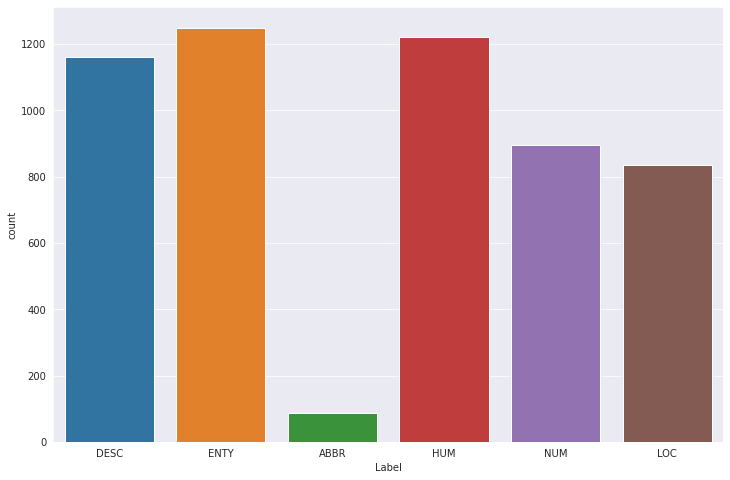

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x='Label',data=final_train)

## Import Machine Learning Packages

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *


In [ ]:
lb = LabelEncoder()
lbl_encoded = lb.fit_transform(final_train['Label'])
lb.classes_

array(['ABBR', 'DESC', 'ENTY', 'HUM', 'LOC', 'NUM'], dtype=object)

In [ ]:
final_train['Label_enc'] = lbl_encoded 
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label,Label_enc
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC,1
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY,2
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC,1
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY,2
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.5398

In [ ]:
features = final_train.drop(['Question','Label','Label_enc'],axis=1)
lbls = final_train['Label_enc']

In [ ]:
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,-0.032483,-1.037481,-0.430439,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,-0.759870,-0.319705,-0.320549,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.288382,0.158904,-0.675779,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-1.323599,-0.134632,-0.420600,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.935546,0.314507,-0.171532,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.539807,-0.619525,0.157020,-0.941711,-0.363686,0.716169,-0.360151,-0.008979,-0.696636,-0.872138,0.

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(features,lbls,test_size=0.15,stratify=lbls)

In [ ]:
X_train.shape,X_val.shape

((4634, 768), (818, 768))

## Build Model

In [ ]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Val Predictions

In [ ]:
y_pred = lr.predict(X_val)
accuracy_score(y_pred,Y_val)

0.8899755501222494

## Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
temp = features
target = lbls
scores = []
scores_val = []

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8817598533455545


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8918423464711274


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8788990825688073


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8752293577981651


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8926605504587156
-----------KFOLD--------------
AxesSubplot(0.125,0.125;0.775x0.755)
0.8752293577981651 0.8926605504587156 0.884078238128474


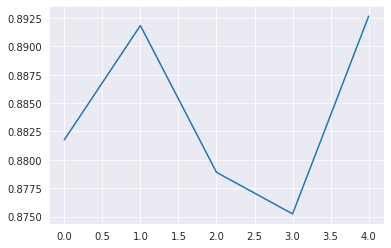

In [ ]:
for train_index,test_index in skf.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = LogisticRegression(multi_class='ovr')

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(accuracy_score(ytest,preds))
        scores.append(accuracy_score(ytest,preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

## Make Predictions on validation Data

In [ ]:
final_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,Question,Label,Label_enc
0,-1.280513,-0.479056,-0.074593,-1.078832,0.555026,-0.304827,0.710984,0.278826,0.129273,0.484495,0.194379,0.099252,0.048627,0.641369,0.453775,-0.550658,-0.685677,0.614255,-0.001949,-0.382198,-0.034111,0.072872,0.070514,-0.182452,-0.672063,-0.203226,0.207312,-0.494412,-0.015926,0.394312,0.036819,0.289581,0.572028,0.346302,-0.048939,0.285914,0.699641,0.078200,-0.658135,-0.720307,...,0.345353,-0.443688,0.326153,0.006781,-0.017737,0.361109,0.084457,-0.220593,-0.326400,0.109498,-0.313511,0.126476,-1.023944,0.019120,0.276654,0.090974,-0.871338,0.066085,0.055101,0.710252,0.815904,0.116723,-0.763052,-0.191135,-0.117061,-0.917495,0.238745,-0.721925,-0.708831,0.919505,0.014720,-0.218466,-0.708000,-0.060461,-0.690395,0.655526,0.429932,manner How did serfdom develop in and then lea...,DESC,1
1,0.050765,-0.231588,0.449181,-0.434118,-0.437005,-0.025377,0.901858,0.299692,0.397571,0.363240,0.813872,-0.242552,-0.046876,0.664556,0.063658,-0.778084,-0.464535,0.818348,0.217839,-0.682175,-0.048325,0.305596,0.005277,-0.105053,-0.850086,-0.180318,0.599912,-0.693823,-0.018519,0.129673,0.459312,0.366444,-0.351863,0.442381,0.333915,-0.367255,1.370850,-0.371236,-0.394274,0.127976,...,0.269263,-0.234702,0.203369,0.363199,0.800868,0.343576,0.986706,-0.211596,0.346223,-0.544377,0.259784,-0.261309,-0.354508,-0.033133,0.439806,0.176840,-0.155799,-1.046834,-0.140346,0.822187,1.090696,-0.127105,-1.281975,0.121476,-0.035387,-1.036540,-0.455563,-1.028529,-0.167688,-0.617333,-0.128335,-0.154140,0.052782,0.287510,-0.945878,0.582182,0.169365,cremat What films featured the character Popey...,ENTY,2
2,0.165783,0.086285,0.996058,-0.007494,-0.062556,-0.447119,1.157737,-0.594609,-0.278916,0.288760,-0.755688,0.518913,-0.589019,-0.218036,-0.299750,-0.588890,-1.044726,0.417887,-0.516429,-0.688118,0.293210,0.023603,-0.186256,0.847153,-0.451656,0.414896,0.153553,-0.524881,0.480987,0.345679,0.525045,0.589052,-0.483123,0.143384,0.049669,-0.625911,1.300623,-0.494312,0.039376,-0.539757,...,-0.603539,-0.569769,0.099041,0.707026,0.829515,-0.109335,0.677547,0.197821,0.223960,-0.297395,-0.826129,-0.965579,-0.218842,1.487623,-0.247484,-0.609410,-0.065344,-0.464756,-0.134924,1.308985,0.461914,-0.319942,-0.315665,-0.672880,0.423251,-1.299873,-0.380740,-1.354729,-0.239816,-0.171939,0.529478,-0.135893,1.097948,-0.018600,-1.401098,-0.166925,-0.666990,manner How can I find a list of celebrities ' ...,DESC,1
3,-0.178117,-0.473958,0.048356,-1.291486,-0.028840,0.348842,-0.046128,0.052367,-0.436607,1.082325,1.379477,0.269813,-0.224945,0.555075,0.196508,-1.012060,-0.139680,0.013313,0.595400,-0.556999,-0.128182,0.313684,-0.397970,0.625162,-1.139045,0.605110,0.438818,-0.294600,-0.015436,-0.200387,-0.028176,0.543886,-0.501193,0.160218,-0.207827,-0.185351,0.511595,-0.588324,0.523014,-0.696837,...,-0.185516,-0.183404,0.793519,0.255795,0.518475,0.655392,0.389528,-0.159402,0.155687,-0.318773,-0.182897,-0.584351,-1.437036,0.627801,0.532542,0.662939,0.678888,-0.622288,0.319153,0.996853,0.696456,0.012059,-0.387256,0.541325,0.047869,-0.789448,-0.599024,-0.941752,0.158490,-0.710274,0.030269,0.281970,0.180029,0.274251,-0.035899,1.007164,-0.209413,animal What fowl grabs the spotlight after the...,ENTY,2
4,-0.341517,-0.614351,0.075421,-0.381870,-0.037141,-0.639595,1.047396,1.109776,-0.500967,-0.308550,-0.026306,0.817467,0.180812,0.402919,0.446856,-0.506134,-0.852798,0.875698,-0.568851,-0.948410,0.342488,-0.257154,-0.041045,1.054365,0.182190,0.183331,0.685496,-0.191476,-0.196328,-0.376523,0.161193,-0.232624,-0.124186,0.408084,0.532742,-0.697111,-0.076796,-0.269128,-0.596582,-0.246367,...,-0.507654,-0.372031,0.384393,-0.427786,-0.062957,0.381885,-0.210031,-0.373228,0.138790,-0.295719,-0.431427,-0.521123,0.406643,0.222614,-0.5398

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(final_train.drop('Label_enc',axis=1),final_train['Label_enc'],test_size=0.15,stratify=final_train['Label_enc'])

In [ ]:
X_val_new = X_val.drop(['Question','Label'],axis=1)

In [ ]:
y_pred = model.predict(X_val_new)

In [ ]:
len(y_pred )

818

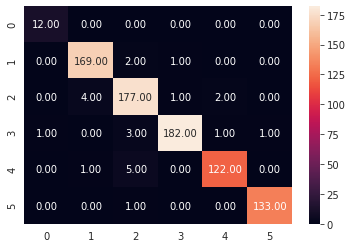

In [ ]:
sns.heatmap(confusion_matrix(y_pred,Y_val),annot=True,fmt=".2f")

In [ ]:
pred_proba = model.predict_proba(X_val_new)

In [ ]:
pred_proba 

array([[1.67967062e-05, 1.37483021e-04, 2.91446292e-02, 9.69867262e-01,
        7.78579392e-04, 5.52492925e-05],
       [2.63708398e-04, 9.54780874e-01, 3.13930487e-02, 1.30276628e-02,
        8.78448417e-07, 5.33827550e-04],
       [3.84414741e-04, 9.79077547e-01, 1.11563144e-03, 1.43318551e-04,
        3.21376154e-05, 1.92469510e-02],
       ...,
       [1.19282102e-06, 2.70288272e-02, 9.67846654e-01, 4.59445779e-03,
        3.72649310e-04, 1.56219290e-04],
       [2.00835630e-03, 2.65582968e-01, 6.40111163e-04, 7.31531580e-01,
        2.36023718e-04, 9.60893969e-07],
       [1.53236552e-04, 3.04565392e-01, 6.95252435e-01, 5.90478023e-07,
        2.79649340e-05, 3.81095755e-07]])

In [ ]:
df_pred = pd.DataFrame(pred_proba,columns=lb.classes_)

In [ ]:
df_pred

,ABBR,DESC,ENTY,HUM,LOC,NUM
0,0.000017,0.000137,0.029145,9.698673e-01,7.785794e-04,5.524929e-05
1,0.000264,0.954781,0.031393,1.302766e-02,8.784484e-07,5.338276e-04
2,0.000384,0.979078,0.001116,1.433186e-04,3.213762e-05,1.924695e-02
3,0.000365,0.050993,0.000029,1.272275e-04,7.109687e-03,9.413756e-01
4,0.000002,0.067660,0.000145,3.754166e-04,3.048897e-05,9.317863e-01
...,...,...,...,...,...,...
813,0.000229,0.000865,0.966235,9.330449e-07,4.361736e-04,3.223346e-02
814,0.000562,0.843561,0.155315,4.833663e-04,2.483263e-05,5.369831e-05
815,0.000001,0.027029,0.967847,4.594458e-03,3.726493e-04,1.562193e-04
816,0.002008,0.265583,0.000640,7.315316e-01,2.360237e-04,9.608940e-07


In [ ]:
X_val[['Question','Label']]

,Question,Label
4197,ind Who killed Martin Luther King ?\n,HUM
5127,def What is fellatio ?\n,DESC
4449,manner How do they get Teflon to stick to the ...,DESC
4439,dist How tall is the Matterhorn ?\n,NUM
1706,count How many people were executed for Abraha...,NUM
...,...,...
694,sport In what sport are these following number...,ENTY
3171,desc What happens to used motor oil ?\n,DESC
2538,color What is your favorite color ?\n,ENTY
2076,gr What court does Bob Woodward describe in Th...,HUM


In [ ]:
predictions_made = X_val[['Question','Label']].copy()

In [ ]:
predictions_made['Label_Predicted'] = y_pred

In [ ]:
predictions_made.head()

,Question,Label,Label_Predicted
4197,ind Who killed Martin Luther King ?\n,HUM,3
5127,def What is fellatio ?\n,DESC,1
4449,manner How do they get Teflon to stick to the ...,DESC,1
4439,dist How tall is the Matterhorn ?\n,NUM,5
1706,count How many people were executed for Abraha...,NUM,5


In [ ]:
predictions_made['Label_Predicted'].unique()

array([3, 1, 5, 2, 4, 0])

In [ ]:
mapper = {k:v for k,v in enumerate(lb.classes_.tolist())}
mapper 

{0: 'ABBR', 1: 'DESC', 2: 'ENTY', 3: 'HUM', 4: 'LOC', 5: 'NUM'}

In [ ]:
predictions_made['Label_Predicted'] = predictions_made['Label_Predicted'].map(mapper)

In [ ]:
predictions_made.reset_index(inplace=True)

In [ ]:
predictions_made = predictions_made.drop('index',axis=1)
predictions_made.head()

,Question,Label,Label_Predicted
0,ind Who killed Martin Luther King ?\n,HUM,HUM
1,def What is fellatio ?\n,DESC,DESC
2,manner How do they get Teflon to stick to the ...,DESC,DESC
3,dist How tall is the Matterhorn ?\n,NUM,NUM
4,count How many people were executed for Abraha...,NUM,NUM


In [ ]:
final_validation_preds = pd.concat((predictions_made,df_pred),axis=1)

In [ ]:
final_validation_preds.head()

,Question,Label,Label_Predicted,ABBR,DESC,ENTY,HUM,LOC,NUM
0,ind Who killed Martin Luther King ?\n,HUM,HUM,0.000017,0.000137,0.029145,0.969867,7.785794e-04,0.000055
1,def What is fellatio ?\n,DESC,DESC,0.000264,0.954781,0.031393,0.013028,8.784484e-07,0.000534
2,manner How do they get Teflon to stick to the ...,DESC,DESC,0.000384,0.979078,0.001116,0.000143,3.213762e-05,0.019247
3,dist How tall is the Matterhorn ?\n,NUM,NUM,0.000365,0.050993,0.000029,0.000127,7.109687e-03,0.941376
4,count How many people were executed for Abraha...,NUM,NUM,0.000002,0.067660,0.000145,0.000375,3.048897e-05,0.931786


##Make Predictions on test data

## Trial purpose - can be ignored

## Use Feature Extraction Pipeline

In [ ]:
import numpy as np
from transformers import pipeline
nlp_features = pipeline('feature-extraction',model='distilbert-base-cased-distilled-squad', tokenizer='distilbert-base-cased')
output = nlp_features(sentences)
np.array(output).shape 

Some weights of the model checkpoint at distilbert-base-cased-distilled-squad were not used when initializing DistilBertModel: ['qa_outputs.weight', 'qa_outputs.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(2, 7, 768)

In [ ]:
np.array(output[0]).shape

(7, 768)